In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('placement.csv')

In [4]:
data

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
#Preprocessing of the data

In [6]:
data = data.iloc[:,1:]

In [7]:
data.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
#EDA Analysis
import matplotlib.pyplot as plt

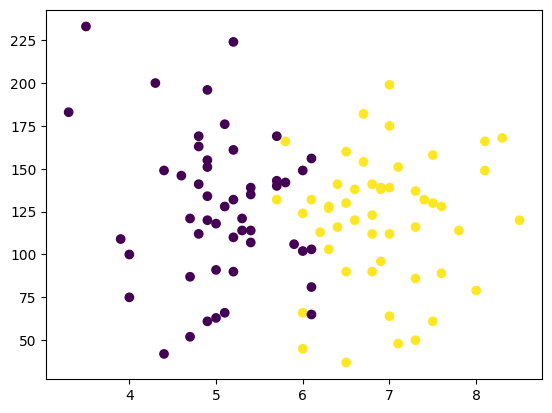

In [9]:
plt.scatter(data['cgpa'], data['iq'], c=data['placement'])

In [10]:
#Extraxt the input and output cols
x = data.iloc[:, 0:2]
y = data.iloc[:, -1]

In [11]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [13]:
#Train Test split
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [15]:
x_train

,cgpa,iq
19,5.2,132.0
56,6.1,65.0
2,5.3,121.0
63,6.3,128.0
32,7.0,139.0
...,...,...
52,7.0,175.0
91,7.5,158.0
69,8.5,120.0
84,5.7,169.0


In [16]:
x_test

,cgpa,iq
71,6.1,132.0
79,6.5,90.0
13,6.4,116.0
12,5.4,139.0
36,5.7,140.0
72,7.3,116.0
25,5.0,91.0
54,6.4,141.0
26,7.0,199.0
38,6.5,160.0


In [17]:
y_train

,placement
19,0
56,0
2,0
63,1
32,1
...,...
52,1
91,1
69,1
84,0


In [18]:
y_train.shape

(90,)

In [19]:
y_test.shape

(10,)

In [20]:
#scale the values
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [46]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test) # It dosen't work on 1D array or vector

In [47]:
x_train

array([[-0.65019875,  0.23206018],
       [ 0.11529687, -1.42198576],
       [-0.56514368, -0.0394996 ],
       [ 0.28540701,  0.13331117],
       [ 0.8807925 ,  0.40487095],
       [ 0.45551715, -2.11322884],
       [ 0.11529687,  0.82455424],
       [ 1.22101277,  0.23206018],
       [-0.05481327, -0.4098084 ],
       [ 0.79573743,  0.40487095],
       [-0.65019875,  0.94799051],
       [-0.82030889, -1.47136027],
       [-0.65019875, -0.31105939],
       [-0.73525382,  0.13331117],
       [ 0.0302418 ,  0.03456215],
       [ 1.73134319, -1.07636422],
       [-0.82030889, -0.11356136],
       [ 0.28540701, -0.48387016],
       [ 1.30606784, -1.52073477],
       [ 0.71068236, -0.80480444],
       [ 1.13595771,  0.35549644],
       [-0.22492341,  0.23206018],
       [-0.90536396, -1.52073477],
       [-1.41569438,  1.91079337],
       [ 0.54057222,  0.38018369],
       [-0.99041903,  0.45424545],
       [-0.90536396,  0.70111798],
       [-2.09613493,  2.72547271],
       [-0.13986834,

In [48]:
x_test

array([[-0.19507561, -0.01303104],
       [ 0.40515703, -1.3812907 ],
       [ 0.25509887, -0.53427282],
       [-1.24548272,  0.21501223],
       [-0.79530824,  0.24758984],
       [ 1.6056223 , -0.53427282],
       [-1.84571535, -1.34871309],
       [ 0.25509887,  0.28016745],
       [ 1.15544782,  2.16966888],
       [ 0.40515703,  0.89914206]])

In [49]:
#Train the model -> here we are using the Logistic Regression model to classify the
#data using the hyperplane based on the scatter plot graph

from sklearn.linear_model import LogisticRegression

In [60]:
clf = LogisticRegression()

#clf.fit(training data) it is use to train the model in Regression
clf.fit(x_train,y_train)

LogisticRegression()

In [61]:
#Evaluate the model/model selection
#clf.predict it is use to predict the output of the train model on the test data

clf.predict(x_test)

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [62]:
y_test

,placement
71,1
79,1
13,1
12,0
36,0
72,1
25,0
54,1
26,1
38,1


In [63]:
#now calculating the accuracy by comparing the actual output vs predicted output
y_pred = clf.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score
# accuracy_score(acutal_output, pred_output)

accuracy_score(y_test, y_pred) #0.9 means the 90% accuracy of our train model

0.9

In [67]:
# To plot classifier hyperplane in the diagram form to see how the model classifies the data
from mlxtend.plotting import plot_decision_regions

<Axes: >

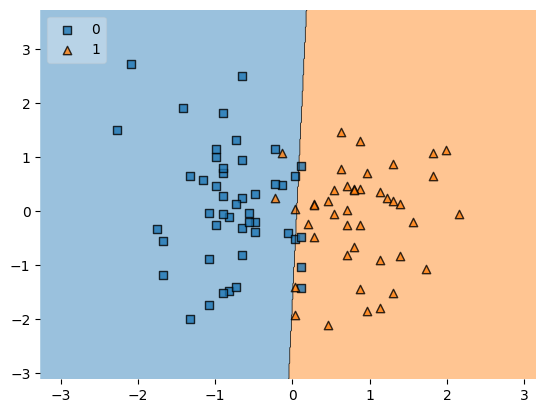

In [74]:
# Plotting decision regions
plot_decision_regions(x_train, y_train, clf=clf, legend=2)

In [75]:
# To import the model
# pickle converts the object to file such that we can use that file of trained model to use whenever we want

import pickle

In [76]:
pickle.dump(clf, open('model.pkl', 'wb'))